## The retirement gap

Data scource: OECD (Organisation for economic co-operation and development)
https://stats.oecd.org/index.aspx?queryid=54758

Hypothesis: The time it takes to retire is directly proportional to earnings. Thanks to pay gap, there must exist a retirement gap.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "data/GENDER_EMP_12032020154226565.csv"
data = pd.read_csv(url)
data.head()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,GBR,United Kingdom,EMP16,"Expected number of years in retirement, by sex",MEN,Men,TOTAL,Total,2010,2010,YR,Years,0,Units,NaN,NaN,18.9,NaN,NaN
1,GBR,United Kingdom,EMP16,"Expected number of years in retirement, by sex",MEN,Men,TOTAL,Total,2012,2012,YR,Years,0,Units,NaN,NaN,19.3,NaN,NaN
2,GBR,United Kingdom,EMP16,"Expected number of years in retirement, by sex",WOMEN,Women,TOTAL,Total,2010,2010,YR,Years,0,Units,NaN,NaN,23.4,NaN,NaN
3,GBR,United Kingdom,EMP16,"Expected number of years in retirement, by sex",WOMEN,Women,TOTAL,Total,2012,2012,YR,Years,0,Units,NaN,NaN,23.1,NaN,NaN
4,OAVG,OECD - Average,EMP16,"Expected number of years in retirement, by sex",MEN,Men,TOTAL,Total,2010,2010,YR,Years,0,Units,NaN,NaN,18.1,NaN,NaN


In [4]:
len(data)

132

In [5]:
data = data[["COU","Country","Sex","Time","Value"]]
data.head()

,COU,Country,Sex,Time,Value
0,GBR,United Kingdom,Men,2010,18.9
1,GBR,United Kingdom,Men,2012,19.3
2,GBR,United Kingdom,Women,2010,23.4
3,GBR,United Kingdom,Women,2012,23.1
4,OAVG,OECD - Average,Men,2010,18.1


In [6]:
uk_data = data.loc[data['COU'] == 'GBR']
uk_data.head()

,COU,Country,Sex,Time,Value
0,GBR,United Kingdom,Men,2010,18.9
1,GBR,United Kingdom,Men,2012,19.3
2,GBR,United Kingdom,Women,2010,23.4
3,GBR,United Kingdom,Women,2012,23.1
9,GBR,United Kingdom,Women,2014,23.1


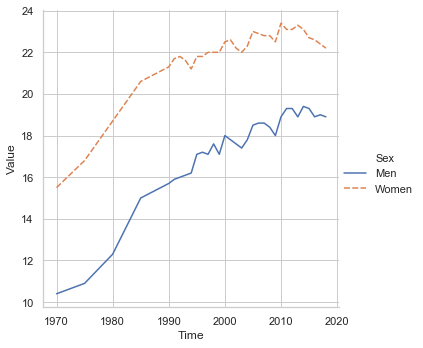

In [32]:
#sns.set(style="whitegrid")
sns.relplot(x="Time", y="Value",
            hue="Sex", style="Sex",
            kind="line", data=uk_data);
# sns.relplot(x="Time", y="Value", hue="Sex",
#           data=uk_data);

Get year values for (women - men) for uk_data

In [8]:
new_uk_data = pd.pivot_table(uk_data, index=['Time'],
                        columns=['Sex'],values=['Value'])

In [9]:
new_uk_data.columns =[s2 for (s1,s2) in new_uk_data.columns.tolist()]

new_uk_data.head()

,Men,Women
Time,,
1970,10.4,15.5
1975,10.9,16.8
1980,12.3,18.7
1985,15.0,20.6
1990,15.7,21.3


In [10]:
new_uk_data['Gap'] = new_uk_data['Women'] - new_uk_data['Men']
new_uk_data.head()

,Men,Women,Gap
Time,,,
1970,10.4,15.5,5.1
1975,10.9,16.8,5.9
1980,12.3,18.7,6.4
1985,15.0,20.6,5.6
1990,15.7,21.3,5.6


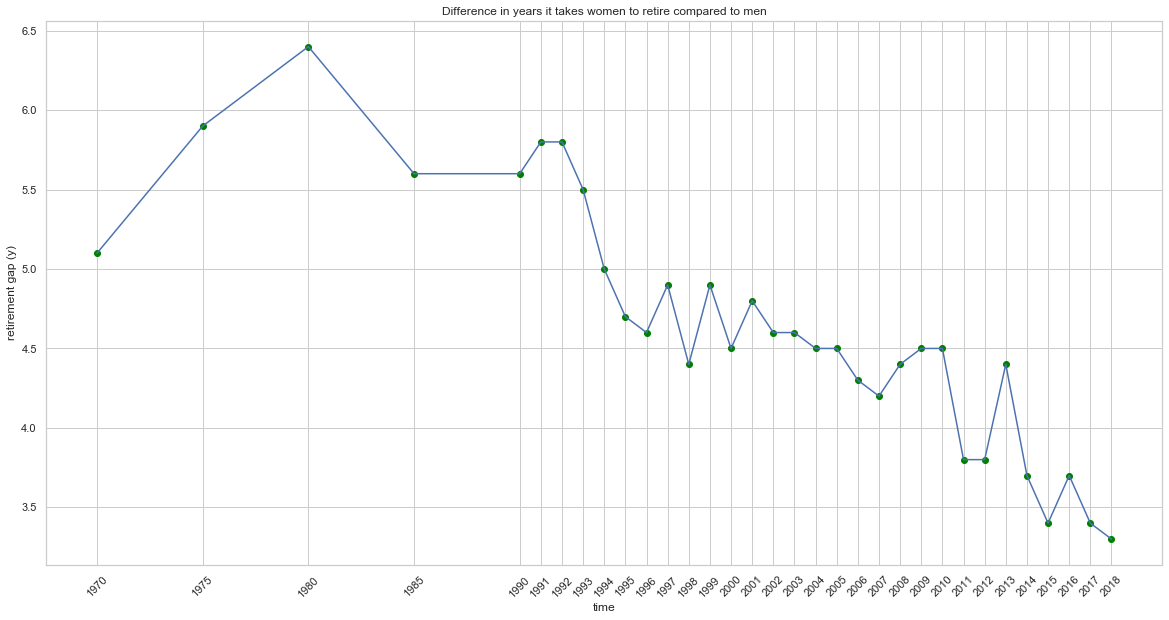

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(new_uk_data.index,new_uk_data['Gap'],c='green')
ax.plot(new_uk_data.index,new_uk_data['Gap'])
ax.set(xlabel='time', ylabel='retirement gap (y)',
       title='Difference in years it takes women to retire compared to men')
plt.xticks(new_uk_data.index, rotation='45')

plt.show()

Decreased but was never zero or negative :(

## Merging with gender pay gap data

Source https://stats.oecd.org/index.aspx?queryid=54751

In [12]:
url2 = "data/GENDER_EMP_12032020181255160.csv"
pg_data = pd.read_csv(url2)
pg_data.head()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,GBR,United Kingdom,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2000,2000,PC,Percentage,0,Units,NaN,NaN,26.3,NaN,NaN
1,GBR,United Kingdom,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2001,2001,PC,Percentage,0,Units,NaN,NaN,25.6,NaN,NaN
2,GBR,United Kingdom,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2002,2002,PC,Percentage,0,Units,NaN,NaN,24.4,NaN,NaN
3,GBR,United Kingdom,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2003,2003,PC,Percentage,0,Units,NaN,NaN,24.1,NaN,NaN
4,GBR,United Kingdom,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2004,2004,PC,Percentage,0,Units,NaN,NaN,23.4,NaN,NaN


In [13]:
pg_data = pg_data[["Time","Value"]]
pg_data.set_index('Time', inplace=True)
pg_data.rename(index={'Latest year':'2020'}, inplace=True)
#pg_data.head()

### TODO: get merge to merge 

In [52]:
mergedDf = pd.merge(new_uk_data,pg_data, left_index=True, right_index=True, how='outer')
# mergedDf

In [15]:
mergedDf['Retirement_gap'] = (mergedDf['Gap'] / mergedDf['Men']) * 100 #convert to percentage
mergedDf.rename(columns={ 'Value': 'Pay_gap'}, inplace=True)

In [16]:
mergedDf = mergedDf[['Retirement_gap','Pay_gap']]

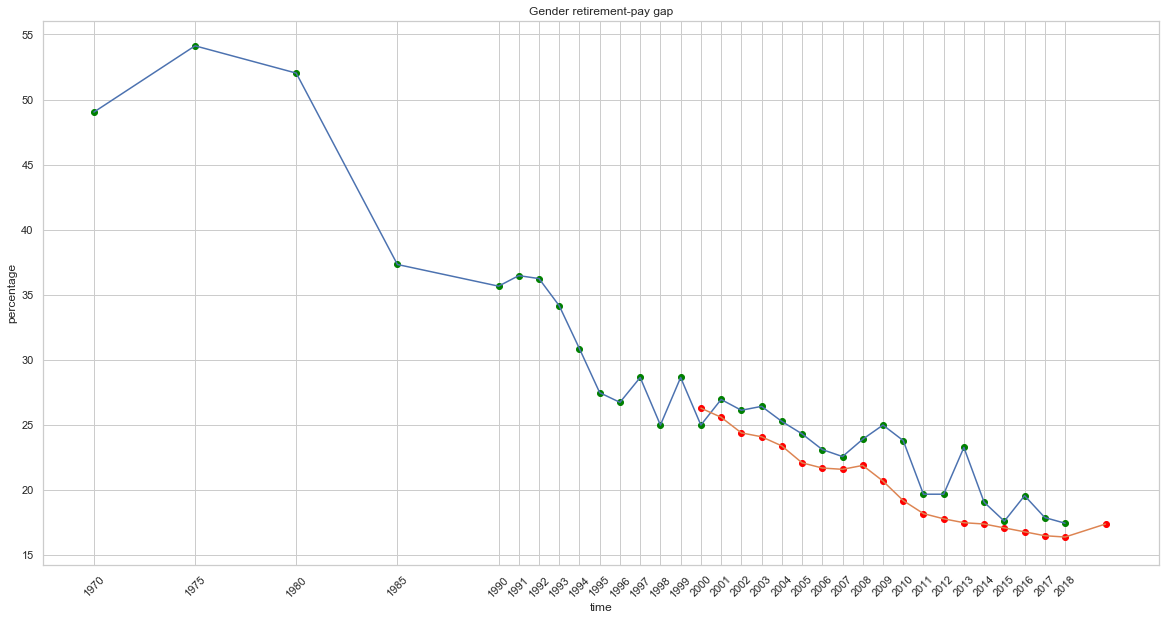

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(mergedDf.index,mergedDf['Retirement_gap'],c='green')
ax.scatter(mergedDf.index,mergedDf['Pay_gap'],c='red')
ax.plot(mergedDf.index,mergedDf['Retirement_gap'])
ax.plot(mergedDf.index,mergedDf['Pay_gap'])
ax.set(xlabel='time', ylabel='percentage',
       title='Gender retirement-pay gap')
plt.xticks(new_uk_data.index, rotation='45')

plt.show()

We can see a decreasing trend but it's not zero.

Extras:
Entrepreneurship  : Gender gap in self-employed earnings https://stats.oecd.org/index.aspx?queryid=54681

## Visualization trials

In [36]:
url = 'data/gender-pay-gap-uk-gov/2019.csv.gz'
data = pd.read_csv(url, compression='gzip')
data.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,1LIFE MANAGEMENT SOLUTIONS LIMITED,"Ldh House St Ives Business Park,\r\nParsons Gr...",02566586,"93110,\r\n93130,\r\n93290",11.0,-0.5,81.5,94.2,10.0,11.4,...,57.7,44.2,55.8,https://www.1life.co.uk/gender-pay-gap,Mark Braithwaite (Managing Director),250 to 499,1LIFE MANAGEMENT SOLUTIONS LIMITED,False,05/04/2020 00:00:00,10/03/2020 17:03:17
1,1ST CHOICE STAFF RECRUITMENT LIMITED,"1ST CHOICE RECRUITMENT,\r\n8 St. Loyes Street,...",07972006,78109,-2.3,0.0,-114.8,-249.3,1.1,0.4,...,37.1,50.0,50.0,https://www.1stchoice.net/gender-pay-gap-repor...,Gill Knight (MD),250 to 499,1ST CHOICE STAFF RECRUITMENT LIMITED,False,05/04/2020 00:00:00,24/01/2020 09:37:01
2,1ST HOME CARE LTD.,"14b Dickson Street,\r\nElgin Industrial Estate...",SC272838,"86900,\r\n88100",-2.0,0.5,NaN,NaN,0.0,0.0,...,91.0,9.0,91.0,https://reallifeoptions.org/,Ian Hardcastle (Chief Operating Officer),250 to 499,1ST HOME CARE LTD.,False,05/04/2020 00:00:00,12/03/2020 08:21:06
3,23.5 DEGREES LIMITED,"Unit 3 Hedge End Retail Park, Charles Watts Wa...",08014079,56103,10.0,0.0,79.0,35.0,4.0,2.0,...,70.0,31.0,69.0,https://www.23-5degrees.com/gender-pay-gap,Luca Contardo (CFO),500 to 999,23.5 DEGREES LIMITED,False,05/04/2020 00:00:00,11/11/2019 15:33:45
4,A. & B. GLASS COMPANY LIMITED,"Addison Road,\r\nChilton Industrial Estate,\r\...",01543721,43342,19.0,4.0,42.0,45.0,70.0,41.0,...,24.0,90.0,10.0,NaN,PHILIP FARNELL (GROUP HR MANAGER),250 to 499,A. & B. GLASS COMPANY LIMITED,False,05/04/2020 00:00:00,20/05/2019 16:34:42


In [37]:
data.shape

(2398, 25)

In [38]:
data.columns

Index(['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
       'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted'],
      dtype='object')

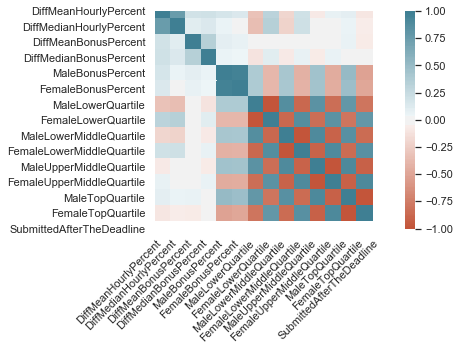

In [39]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [40]:
salary_diff_cols = ['DiffMeanHourlyPercent','DiffMedianHourlyPercent','DiffMeanBonusPercent','DiffMedianBonusPercent']
bonus_cols = ['MaleBonusPercent','FemaleBonusPercent']

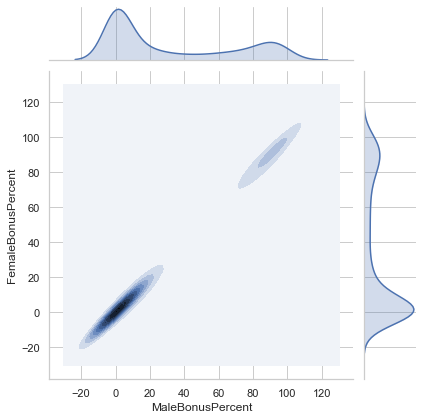

In [41]:
bonus_data = data[bonus_cols]
# sns.jointplot(x=bonus_data.MaleBonusPercent, y=bonus_data.FemaleBonusPercent, kind='scatter')
# sns.jointplot(x=bonus_data.MaleBonusPercent, y=bonus_data.FemaleBonusPercent, kind='hex')
sns.jointplot(x=bonus_data.MaleBonusPercent, y=bonus_data.FemaleBonusPercent, kind='kde')

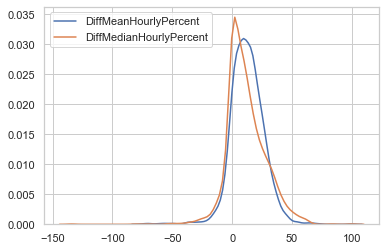

In [42]:
salary_diff_data = data[salary_diff_cols]
sns.kdeplot(salary_diff_data.DiffMeanHourlyPercent)
sns.kdeplot(salary_diff_data.DiffMedianHourlyPercent)

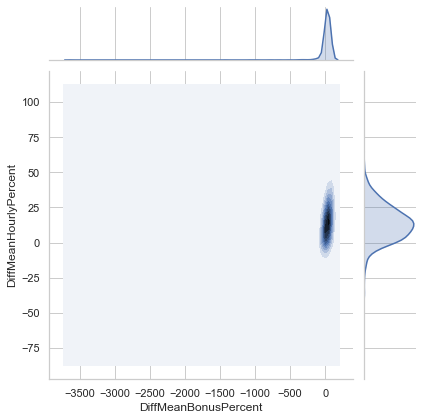

In [43]:
sns.jointplot(x=salary_diff_data.DiffMeanBonusPercent,y=salary_diff_data.DiffMeanHourlyPercent,kind='kde')
#no relation between salary diff and bonus diff

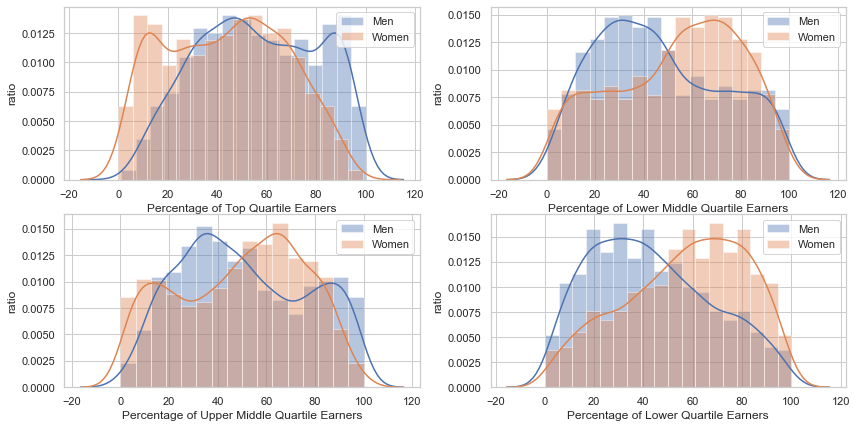

In [44]:
f, axes = plt.subplots(2, 2, figsize=(14, 7), sharex=False)
ax1 = sns.distplot(data.MaleTopQuartile, label='Men', ax=axes[0,0])
ax1 = sns.distplot(data.FemaleTopQuartile, label='Women', ax=axes[0,0])
ax1.set(xlabel='Percentage of Top Quartile Earners', ylabel='ratio')
ax1.legend()

ax2 = sns.distplot(data.MaleLowerMiddleQuartile, label='Men', ax=axes[0,1])
ax2 = sns.distplot(data.FemaleLowerMiddleQuartile, label='Women', ax=axes[0,1])
ax2.set(xlabel='Percentage of Lower Middle Quartile Earners', ylabel='ratio')
ax2.legend()

ax3 = sns.distplot(data.MaleUpperMiddleQuartile, label='Men', ax=axes[1,0])
ax3 = sns.distplot(data.FemaleUpperMiddleQuartile, label='Women', ax=axes[1,0])
ax3.set(xlabel='Percentage of Upper Middle Quartile Earners', ylabel='ratio')
ax3.legend()

ax4 = sns.distplot(data.MaleLowerQuartile, label='Men', ax=axes[1,1])
ax4 = sns.distplot(data.FemaleLowerQuartile, label='Women', ax=axes[1,1])
ax4.set(xlabel='Percentage of Lower Quartile Earners', ylabel='ratio')
ax4.legend()

In [46]:
siccodeUrl = "data/siccodes/SIC07_CH_condensed_list_en.csv"
siccode = pd.read_csv(siccodeUrl)
siccode.head()

,SIC Code,Description
0,1110,"Growing of cereals (except rice), leguminous c..."
1,1120,Growing of rice
2,1130,"Growing of vegetables and melons, roots and tu..."
3,1140,Growing of sugar cane
4,1150,Growing of tobacco


In [47]:
url1 = "data/siccodes/uk-sic-2007-condensed_csv.csv"
sic = pd.read_csv(url1)
sic.head()

,sic_code,sic_description,section,section_description,sic_version
0,1110,"Growing of cereals (except rice), leguminous c...",A,"Agriculture, Forestry and Fishing",SIC 2007
1,1120,Growing of rice,A,"Agriculture, Forestry and Fishing",SIC 2007
2,1130,"Growing of vegetables and melons, roots and tu...",A,"Agriculture, Forestry and Fishing",SIC 2007
3,1140,Growing of sugar cane,A,"Agriculture, Forestry and Fishing",SIC 2007
4,1150,Growing of tobacco,A,"Agriculture, Forestry and Fishing",SIC 2007


In [48]:
#picked up on the internet
def sic_desc(df):
    
    df = df[~df.SicCodes.isna()]
    
    df['SicCodes'] = df.apply(lambda row: row.SicCodes.replace('\n','')\
                                                      .replace('\r','')\
                                                      .split(','), axis=1)
    df = df.explode('SicCodes')
    df['SicCodes'] = pd.to_numeric(df.SicCodes)
    
    return df.merge(sic, how='left', left_on='SicCodes', 
                    right_on='sic_code')

In [49]:
modified_data = sic_desc(data)
modified_data.head()

/Users/shivangi/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted,sic_code,sic_description,section,section_description,sic_version
0,1LIFE MANAGEMENT SOLUTIONS LIMITED,"Ldh House St Ives Business Park,\r\nParsons Gr...",02566586,93110,11.0,-0.5,81.5,94.2,10.0,11.4,...,250 to 499,1LIFE MANAGEMENT SOLUTIONS LIMITED,False,05/04/2020 00:00:00,10/03/2020 17:03:17,93110.0,Operation of sports facilities,R,"Arts, entertainment and recreation",SIC 2007
1,1LIFE MANAGEMENT SOLUTIONS LIMITED,"Ldh House St Ives Business Park,\r\nParsons Gr...",02566586,93130,11.0,-0.5,81.5,94.2,10.0,11.4,...,250 to 499,1LIFE MANAGEMENT SOLUTIONS LIMITED,False,05/04/2020 00:00:00,10/03/2020 17:03:17,93130.0,Fitness facilities,R,"Arts, entertainment and recreation",SIC 2007
2,1LIFE MANAGEMENT SOLUTIONS LIMITED,"Ldh House St Ives Business Park,\r\nParsons Gr...",02566586,93290,11.0,-0.5,81.5,94.2,10.0,11.4,...,250 to 499,1LIFE MANAGEMENT SOLUTIONS LIMITED,False,05/04/2020 00:00:00,10/03/2020 17:03:17,93290.0,Other amusement and recreation activities n.e.c.,R,"Arts, entertainment and recreation",SIC 2007
3,1ST CHOICE STAFF RECRUITMENT LIMITED,"1ST CHOICE RECRUITMENT,\r\n8 St. Loyes Street,...",07972006,78109,-2.3,0.0,-114.8,-249.3,1.1,0.4,...,250 to 499,1ST CHOICE STAFF RECRUITMENT LIMITED,False,05/04/2020 00:00:00,24/01/2020 09:37:01,78109.0,Other activities of employment placement agencies,N,Administrative and support service activities,SIC 2007
4,1ST HOME CARE LTD.,"14b Dickson Street,\r\nElgin Industrial Estate...",SC272838,86900,-2.0,0.5,NaN,NaN,0.0,0.0,...,250 to 499,1ST HOME CARE LTD.,False,05/04/2020 00:00:00,12/03/2020 08:21:06,86900.0,Other human health activities,Q,Human health and social work activities,SIC 2007


In [30]:
modified_data.section_description.unique

<bound method Series.unique of 0                      Arts, entertainment and recreation
1                      Arts, entertainment and recreation
2                      Arts, entertainment and recreation
3           Administrative and support service activities
4                 Human health and social work activities
                              ...                        
3540                                                  NaN
3541                        Information and communication
3542                        Information and communication
3543    Wholesale and retail trade; repair of motor ve...
3544                   Financial and insurance activities
Name: section_description, Length: 3545, dtype: object>

In [54]:
sad_data = modified_data[(modified_data.DiffMeanHourlyPercent>30)]
sad_data.groupby('section_description').count()['section'].sort_values(ascending=False).head(15)

section_description
Education                                                   51
Financial and insurance activities                          46
Wholesale and retail trade; repair of motor vehicles and    39
Construction                                                28
Administrative and support service activities               24
Manufacturing                                               19
Professional, scientific and technical activities           16
Human health and social work activities                     13
Arts, entertainment and recreation                           7
Information and communication                                6
Transportation and storage                                   6
Electricity, gas, steam and air conditioning supply          5
Real estate activities                                       3
Other service activities                                     2
Public administration and defence; compulsory social         2
Name: section, dtype: int64